In [1]:
import numpy as np
import cv2
import flirimageextractor
from matplotlib import cm
from matplotlib import pyplot as plt
flir = flirimageextractor.FlirImageExtractor(palettes=[cm.jet])
import math
%matplotlib inline

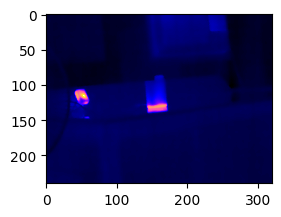

In [2]:
flir.process_image('FLIR0001.jpg')
flir.save_images()
flir.plot()

In [3]:
thermim=flir.extract_thermal_image()
thermim.shape

(240, 320)

In [4]:
thermim

array([[29.80719503, 29.79713118, 29.79713118, ..., 29.57549335,
        29.58053554, 29.58053554],
       [29.80216322, 29.79713118, 29.78706641, ..., 29.57549335,
        29.57549335, 29.57549335],
       [29.79713118, 29.78706641, 29.77196753, ..., 29.57045093,
        29.57045093, 29.57045093],
       ...,
       [30.22403671, 30.21902388, 30.21902388, ..., 29.95804255,
        29.96306724, 29.97311595],
       [30.22403671, 30.22403671, 30.21401082, ..., 29.95804255,
        29.96306724, 29.97311595],
       [30.21902388, 30.21902388, 30.21401082, ..., 29.95804255,
        29.96306724, 29.97813996]])

In [5]:
np.min(thermim),np.max(thermim)

(29.20678688770124, 40.57142178593949)

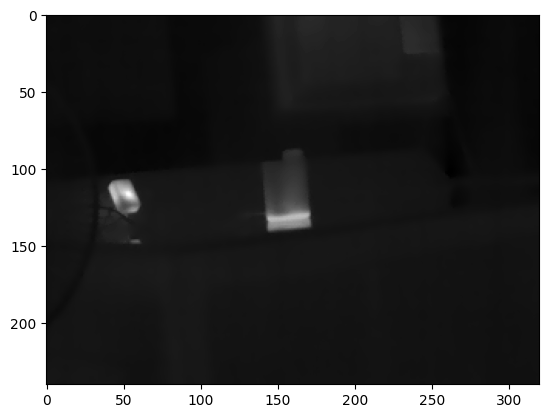

In [6]:
plt.imshow(thermim,cmap='gray')

In [7]:
visb=flir.extract_embedded_image()
visb.shape

(960, 1280, 3)

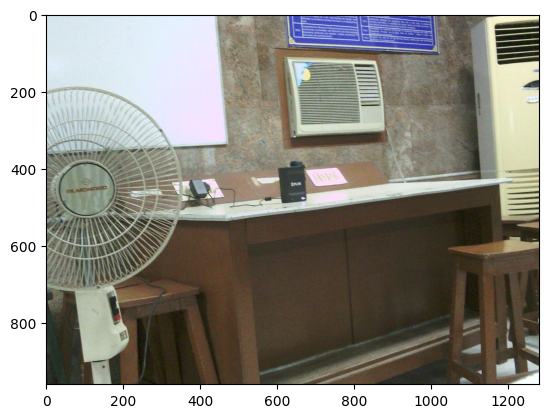

In [8]:
plt.imshow(visb)

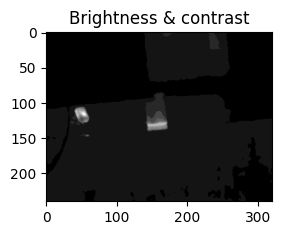

In [9]:
# Adjust the brightness and contrast 
# Adjusts the brightness by adding 10 to each pixel value 
brightness = 10 
# Adjusts the contrast by scaling the pixel values by 2.3 
contrast = 2.3  
gray_image=np.uint8(thermim)
image2 = cv2.addWeighted(gray_image, contrast, np.zeros(gray_image.shape, gray_image.dtype), 0, brightness) 
  
#Save the image 
# cv2.imwrite('modified_image.jpg', image2) 
#Plot the contrast image 
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(image2,cmap='gray') 
plt.show()

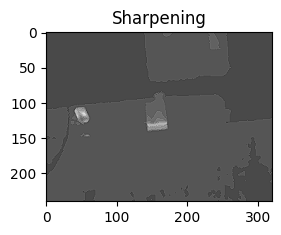

In [10]:
# Create the sharpening kernel 
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  
# Sharpen the image 
sharpened_image = cv2.filter2D(gray_image, -1, kernel) 
  
#Save the image 
cv2.imwrite('sharpened_image.jpg', sharpened_image) 
  
#Plot the sharpened image 
plt.subplot(1, 2, 2) 
plt.title("Sharpening") 
plt.imshow(sharpened_image,cmap='gray') 
plt.show()

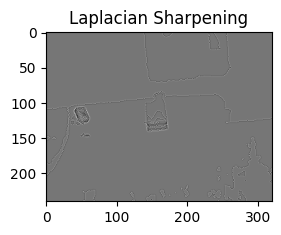

In [11]:
# Sharpen the image using the Laplacian operator 
sharpened_image2 = cv2.Laplacian(gray_image, cv2.CV_64F) 
  
#Save the image 
# cv2.imwrite('Laplacian sharpened_image.jpg', sharpened_image2) 
  
#Plot the sharpened image 
plt.subplot(1, 2, 2) 
plt.title("Laplacian Sharpening") 
plt.imshow(sharpened_image2,cmap='gray') 
plt.show()

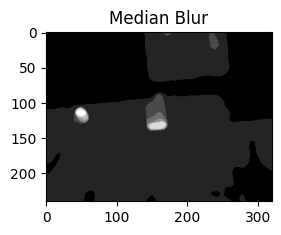

In [12]:
# Remove noise using a median filter 
filtered_image = cv2.medianBlur(gray_image, 11) 
  
#Save the image 
# cv2.imwrite('Median Blur.jpg', filtered_image) 
  
#Plot the blured image 
plt.subplot(1, 2, 2) 
plt.title("Median Blur") 
plt.imshow(filtered_image,cmap='gray') 
plt.show()

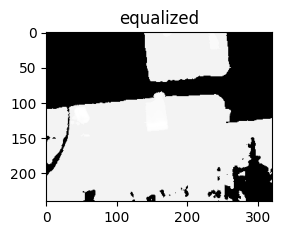

In [13]:
# Equalize the histogram 
equalized_image = cv2.equalizeHist(gray_image) 
  
#Save the equalized image 
# cv2.imwrite('equalized.jpg', equalized_image) 
  
#Plot the equalized image 
plt.subplot(1, 2, 2) 
plt.title("equalized") 
plt.imshow(equalized_image,cmap='gray') 
plt.show()

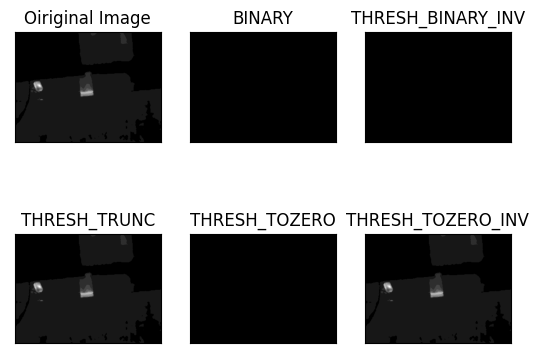

In [14]:
#here 0 means that the image is loaded in gray scale format
gray_image = np.uint8(thermim)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

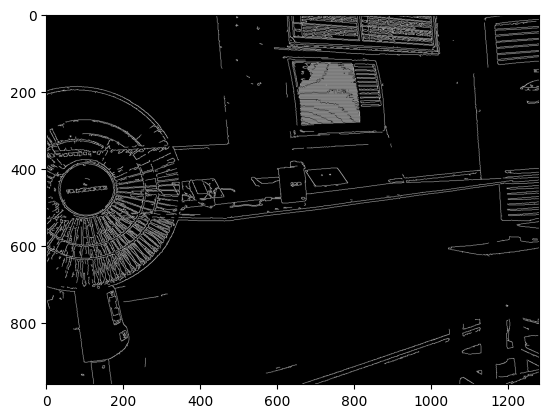

In [15]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(visb,127,255) 
#plot the edges
plt.imshow(edges,cmap='gray')

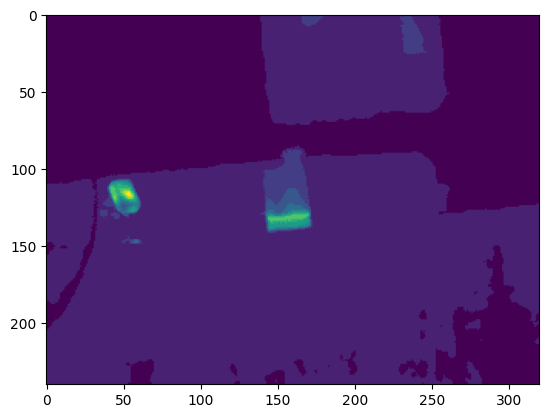

In [16]:
plt.imshow(gray_image)

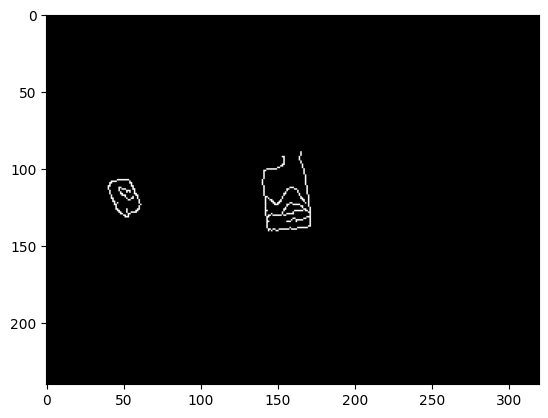

In [17]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(gray_image,0,19) 
#plot the edges
plt.imshow(edges,cmap='gray')

In [18]:
gray_image

array([[29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       ...,
       [30, 30, 30, ..., 29, 29, 29],
       [30, 30, 30, ..., 29, 29, 29],
       [30, 30, 30, ..., 29, 29, 29]], dtype=uint8)